<a href="https://colab.research.google.com/github/corochena/projecteuler/blob/main/pe_54_Poker_hands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

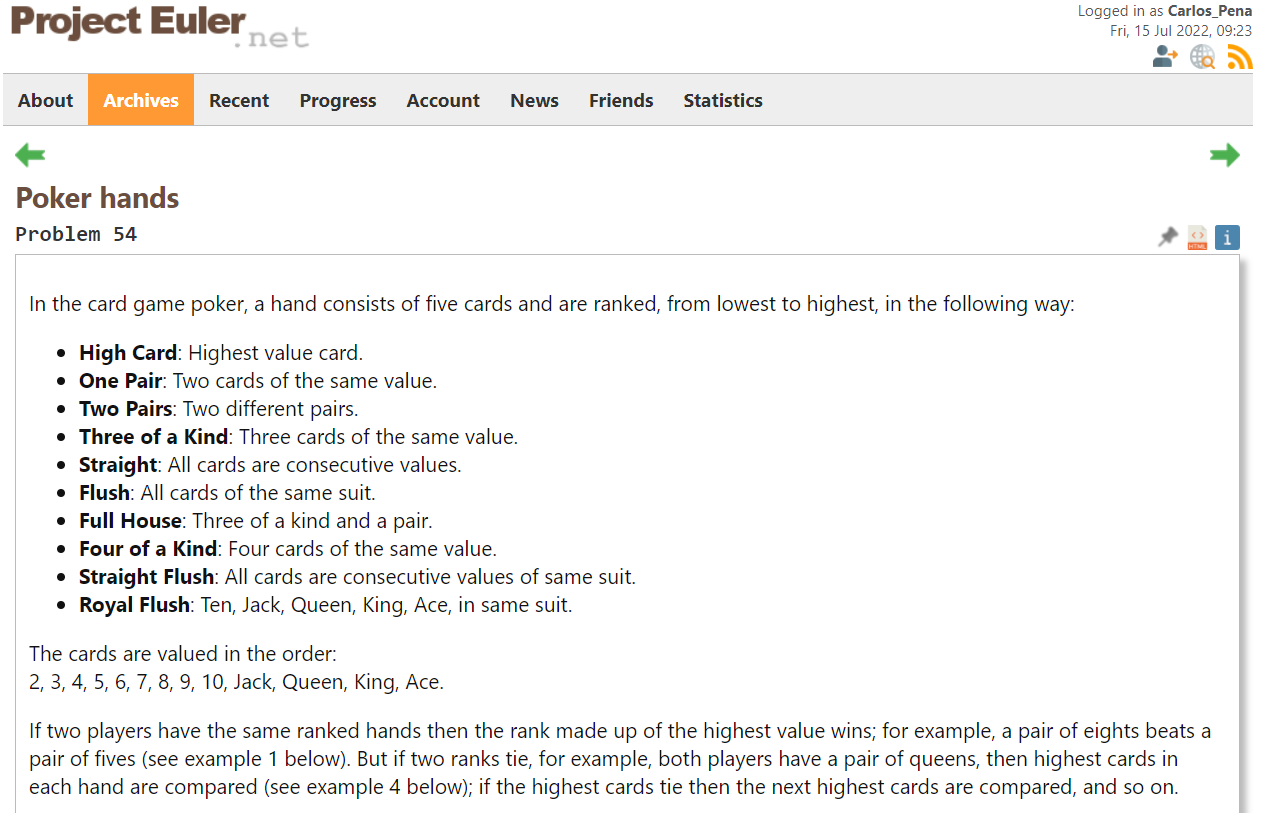

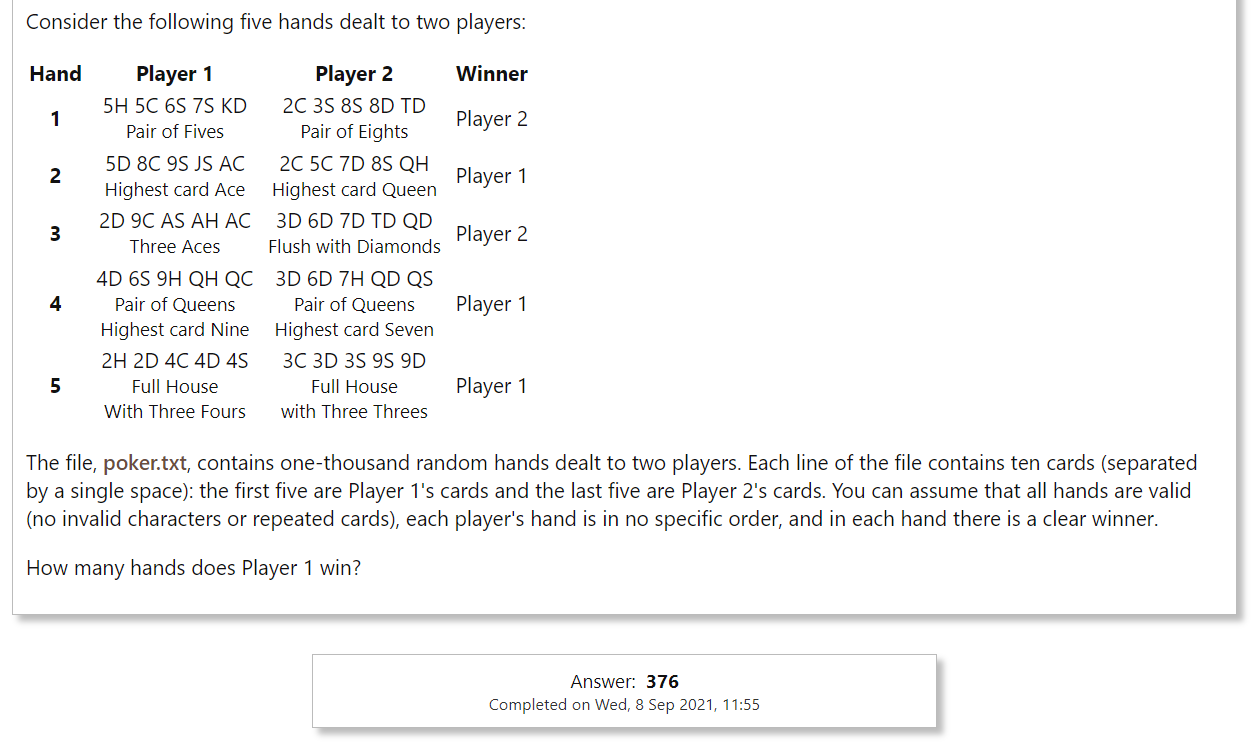

In [ ]:
def getCards():
  import urllib.request as url

  f = url.urlopen('https://projecteuler.net/project/resources/p054_poker.txt')

  cards1 = []
  cards2 = []

  for line in f:
    line = line.decode('utf8')
    cards1.append(line[:14].split(' '))
    cards2.append(line[15:-1].split(' '))

  return cards1, cards2

In [ ]:
def rankHand(hand):
  order = '0123456789TJQKA' # order of cards
  
  numbers = [c[0] for c in hand]
  numbers.sort(reverse=True, key=lambda card: order.index(card))

  joined = ''.join(hand)
  suits = joined[1::2]

  sameSuit = suits[0]*5 == suits

  cardcount = {c: numbers.count(c) for c in numbers}
  rep = { 'dob':[], 'trip':[], 'cuad':[] }

  #straight
  numval = list(map(lambda card: order.index(card), numbers))
  straight = numval == list(range(numval[0], numval[-1] - 1, -1))

  for key, val in cardcount.items():
    if val == 2:
      rep['dob'].append(order.index(key))
    if val == 3:
      rep['trip'].append(order.index(key))
    if val == 4:
      rep['cuad'].append(order.index(key))

  # defini una lista para el rank ya que se puede comparar facilmente cual es mayor
  # con un simple r1 > r2. Como los empates solo se daban en los casos de 1 par y
  # 2 pares, no agregue mas codigo para desempate en casos de rank mas altos
  rank = [1, 0, 0, max(numval)]
  if len(rep['dob']) == 1:
    rank = [2, 0, rep['dob'][0], max(numval)]
  if len(rep['dob']) == 2:
    rank = [3, max(rep['dob']), min(rep['dob']), max(numval)]
  if len(rep['trip']) == 1:
    rank = [4, 0, 0, 0]
  if straight:
    rank = [5, 0, 0, 0]
  if sameSuit:
    rank = [6, 0, 0, 0]
  if len(rep['dob']) == 1 and len(rep['trip']) == 1:
    rank = [7, 0, 0, 0]
  if len(rep['cuad']) == 1:
    rank = [8, 0, 0, 0]
  if straight and sameSuit:
    rank = [9, 0, 0, 0]
    if numbers[0] == 'A':
      rank = [10, 0, 0, 0]
  return rank

cards1, cards2 = getCards()

win1 = 0
win2 = 0
tie = 0

for mano1, mano2 in zip(cards1, cards2):
  r1 = rankHand(mano1)
  r2 = rankHand(mano2)
  if r1 > r2:
    win1 += 1
  if r1 < r2:
    win2 += 1
  if r1 == r2:
    tie += 1
print(win1, win2, tie) 


376 624 0
